# Welcome to 'Car detection from traffic data'


Car detection is a simple task used in solving many problems related to road transport safety and autonomous vehicle. In this case, we will be considering the case of a live feed from a vehicle, and we want to detect if there is a vehicle in front of us or not.

In order to detect the people from the  camera we will be using the 'vehicle-detection-adas-0002' pre-trained models from the OpenVINO model zoo. You can find out more about it here ->https://docs.openvinotoolkit.org/2019_R1/usergroup1.html


In [1]:
import cv2
import numpy as np
from utils.opv import OpvModel  
import matplotlib.pyplot as plt


/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/srv/conda/envs/notebook/lib/python3.7/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


## Task: Load the pretrained model 

In [2]:
mymodel2 = OpvModel("vehicle-detection-adas-0002",device="CPU", fp="FP16", ncs=1)

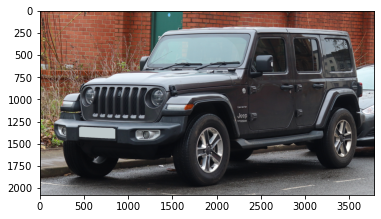

In [4]:
image = cv2.imread("2018_Jeep_Wrangler_Sahara_Unlimited_Multijet_2.1_Front.jpg")
# load image using cv2....and do processing.
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

In [5]:
image = cv2.resize(image,(1200,710))     #Downsize the image since the original is quite large
predictions = mymodel2.Predict(image)

In [6]:
print(predictions.shape)

(1, 1, 200, 7)


## Task: The main code



## Task: Draw Bounding Box around the vehicle

We create a function to draw a bounding box around the vehicle image that has been detected.


In [ ]:
pip install google.colab

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/compat/__init__.py:437: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(dateutil.__version__) < LooseVersion('2.5'):
/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/compat/numpy/__init__.py:11: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _nlv = LooseVersion(_np_version)
/srv/conda/envs/notebook/lib/python3.7/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


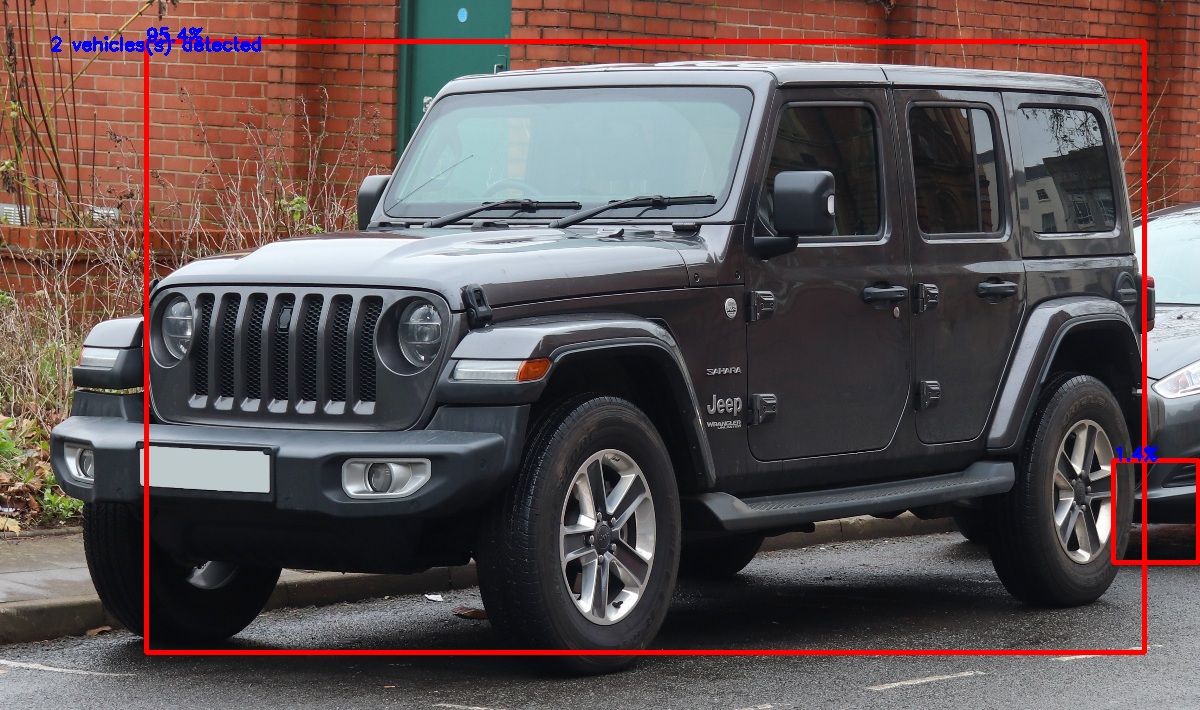

In [10]:
from google.colab.patches import cv2_imshow
def DrawBoundingBoxes(predictions, image):
    canvas = image.copy()                             # copy instead of modifying the original image
    predictions_1 = predictions[0][0]                 # subset dataframe
    confidence = predictions_1[:,2]                   # getting conf value [image_id, label, conf, x_min, y_min, x_max, y_max]
    topresults = predictions_1[(confidence>0)]     # choosing only predictions with conf value bigger than treshold
    (h,w) = canvas.shape[:2]                        # setting the variable h and w according to image height
    
    #
    for detection in topresults:
        box = detection[3:7] * np.array([w, h, w, h]) # determine box location
        (xmin, ymin, xmax, ymax) = box.astype("int") # assign box location value to xmin, ymin, xmax, ymax

        cv2.rectangle(canvas, (xmin, ymin), (xmax, ymax), (0, 0, 255), 4)  # make a rectangle
        cv2.putText(canvas, str(round(detection[2]*100,1))+"%", (xmin, ymin), # include text
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)
        cv2.putText(canvas, str(len(topresults))+" vehicles(s) detected", (50,50), # include text
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)
    return canvas

cv2_imshow(DrawBoundingBoxes(predictions,image))


## Task: Create a threshold.

If there are 1 or more cars in front of the vehicle then print out a statement "Vehicle ahead".

In [7]:
def DrawBoundingBoxes(predictions, image, conf=0.5):
    canvas = image.copy()                             # copy instead of modifying the original image
    predictions = predictions[0][0]
    confidence = predictions[:,2]
    topresults = predictions[(confidence>conf)]
    (h,w) = canvas.shape[:2]
    for detection in topresults:
        box = detection[3:7] * np.array([w, h, w, h])
        (xmin, ymin, xmax, ymax) = box.astype("int")

        cv2.rectangle(canvas, (xmin, ymin), (xmax, ymax), (0, 0, 255), 4)
        cv2.putText(canvas, str(round(detection[2]*100,1))+"%", (xmin, ymin),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)
        cv2.putText(canvas,"Vehicle ahead", (50,50),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)
    return canvas